In [ ]:
# Exploratory Data Analysis (EDA) on Retail Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [4]:
# Loading dataset
df = pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
# Dataset Overview
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
# Missing value & clenning
df.isnull().sum()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
# Descriptive Statices
df["Total Amount"].mean()
df["Total Amount"].median()
df["Total Amount"].mode()
df["Total Amount"].std()

559.997631555123

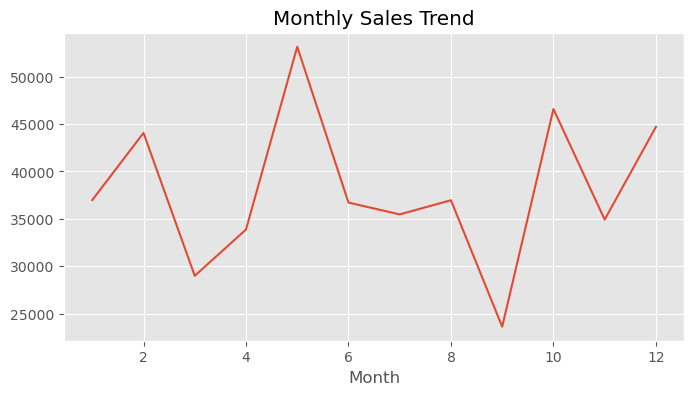

In [9]:
# Time series Analysis
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month

monthly_sales = df.groupby("Month")["Total Amount"].sum()

monthly_sales.plot(kind="line", figsize=(8,4))
plt.title("Monthly Sales Trend")
plt.show()

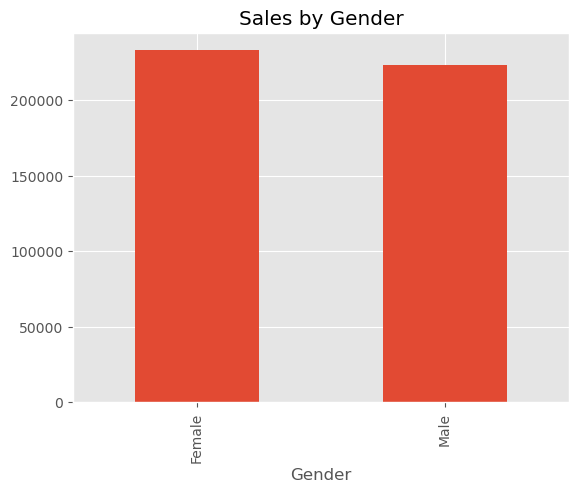

In [10]:
# Customer Analysis
df.groupby("Gender")["Total Amount"].sum().plot(kind="bar")
plt.title("Sales by Gender")
plt.show()

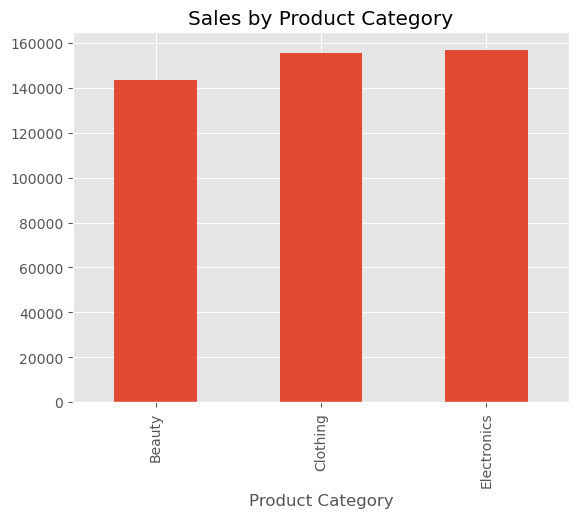

In [11]:
# Product Analysis
df.groupby("Product Category")["Total Amount"].sum().plot(kind="bar")
plt.title("Sales by Product Category")
plt.show()

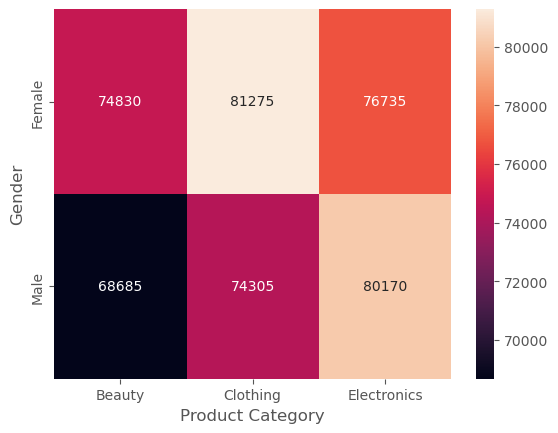

In [12]:
# Heatmap
pivot = df.pivot_table(values="Total Amount",
                       index="Gender",
                       columns="Product Category",
                       aggfunc="sum")

sns.heatmap(pivot, annot=True, fmt=".0f")
plt.show()

In [ ]:
## Insights & Recommendations
'''
- Identified seasonal sales trends
- Certain categories contribute higher revenue
- Customer purchasing behavior varies by gender
'''